# Ch13: Multiple Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

%matplotlib inline

In [2]:
import statsmodels.api as sm
from ISLP import load_data
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests

## Conceptual

### **Q1.**

**(a)** We expect to get $\alpha$ Type $\text{I}$ errors for each of the $m$ null hypotheses, so a total of $(\alpha \times m)$ Type $\text{I}$ errors.

**(b)** This is simply the result obtained in (13.5) in the book.

$$
\text{FWER}(\alpha) = 1 - (1 - \alpha)^m
$$

**(c)** Supposing that the two $p$-values are perfectly correlated, that is $p_1 = p_2$, the $\text{FWER}$ would be:

\begin{align*}
\text{FWER}(\alpha) &= \text{Pr}\left( \text{reject}\space H_{01} \space \text{or} \space \text{reject} \space H_{02} \right) \\
                    &= \text{Pr}\left( p_1 \le \alpha \cap p_2 \le \alpha \right)
\end{align*}


Since $p_1 = p_2$ the probability that $p_1 \le \alpha$ or $p_2 \le \alpha$ is simply the probability that $p < \alpha$ where $p = p_1 = p_2$ then the $\text{FWER}$ would simplify to:

\begin{align*}
\text{FWER}(\alpha) &= \text{Pr}\left( p \le \alpha \right) \\
                    &= \alpha \\
\end{align*}



This is smaller than the $\text{FWER}$ of **(b)** with $m = 2$ which is:

\begin{align*}
\text{FWER}(\alpha) &= 1 - (1 - \alpha)^2 \\ 
            &= 1 - (1 - 2\alpha + \alpha^2) \\
            &= 2 \alpha - \alpha^2 \\ 
\end{align*}

Since $\alpha$ is always between zero and one:

$$
\alpha \le 2\alpha - \alpha^2
$$

**(d)** Starting with the extreme case highlighted in the hint, we'll assume that whenever one $p$-value is less than $\alpha$, the other will be greater than $\alpha$, then the family-wise error rate would be:

\begin{align*}
\text{FWER}(\alpha) &= \text{Pr}\left( \text{reject}\space H_{01} \space \text{or} \space \text{reject} \space H_{02} \right) \\
                    &= \text{Pr}\left( \text{reject}\space H_{01} \right) + \text{Pr}\left( \text{reject} \space H_{02} \right) \\
                    &= \alpha + \alpha \\
                    &= 2 \alpha
\end{align*}

Where the second equality results from them being mutually exclusive.

As we can see this is greater than the $\text{FWER}$ in the case of independant tests in 



**(b)**.

I'll also plot the $3$ cases on the same plot.

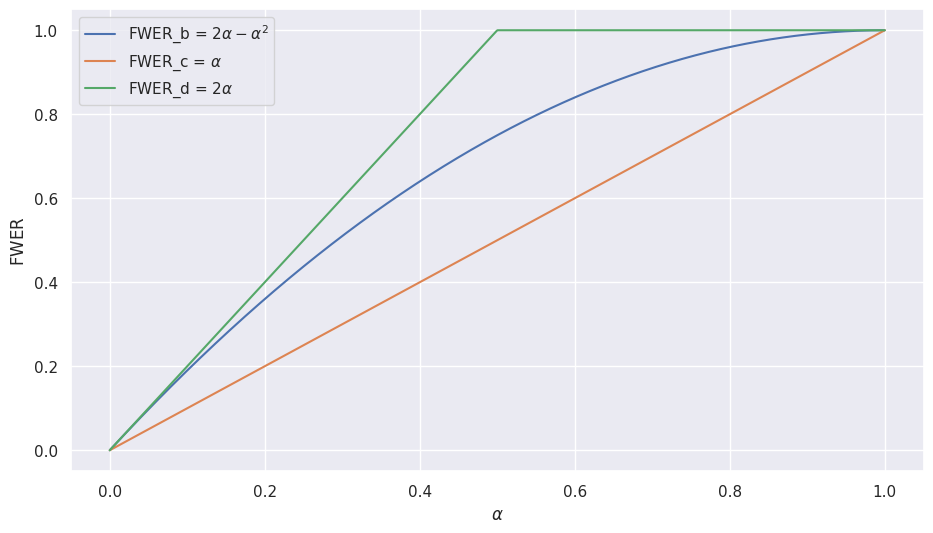

In [3]:
a = np.linspace(0, 1, 1000)

fwer_b = 2*a - a**2
fwer_c = a
fwer_d = np.clip(2*a, 0.0, 1.0) 

fig, ax = plt.subplots(figsize=(11,6))
ax.plot(a, fwer_b, label="FWER_b = $2\\alpha - \\alpha^2$")
ax.plot(a, fwer_c, label="FWER_c = $\\alpha$")
ax.plot(a, fwer_d, label="FWER_d = $2\\alpha$")
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$\\text{FWER}$")
ax.legend();

Note: I clipped the function obtained from **(d)** as the extreme assumption breaks down at $\alpha = 0.5$

### **Q2.**

**(a)**


If we model the rejection of the $j\text{th}$ null hypothesis as a success, then the distribution of $A_{j}$ would be:

$$
A_j \sim \text{Bernoulli}(\alpha)
$$

**(b)**


The sum of the $m$ Bernoulli trials would be Binomial with parameters $m$ and $\alpha$:

$$
\sum^m_{j=1} A_j \sim B(m, \alpha)
$$

**(c)** The standard deviation of a Binomial distribution with parameters $m$ and $\alpha$ would be:

$$
\sqrt{m \alpha (1 - \alpha)}
$$

### **Q3.**

To argue that:

$$
\text{FWER}(\alpha) \le \sum^m_{j = 1} \alpha_j
$$

We'll start with the defintion of the $\text{FWER}$ and make the assumptions that the $m$ tests are independent and all the $m$ null hypotheses are true:

\begin{align*}
\text{FWER}(\alpha) &= \text{Pr} \left( V \ge 1 \right) \\
                    &= \text{Pr} \left( \text{falsely reject at least one null hypothesis} \right) \\
                    &= \text{Pr} \left( \bigcup^m_{j = 1} \{ \text{reject} \space H_{0j} \} \right) \\
                    &\le \sum^m_{j = 1} \text{Pr} \left( \{ \text{reject} \space H_{0j} \} \right) \\
                    &\le \sum^m_{j = 1} \alpha_j \\
\end{align*}


Where the inequality results from the fact that for any two events $A$ and $B$, $\text{Pr}(A \cup B) \le \text{Pr}(A) + \text{Pr}(B)$.

### **Q4.**

**(a)** We would reject the null hypotheses for values of $p$ less than $0.05$ namely:

$$
H_{01}, H_{02}, H_{03}, H_{08}, H_{09}, H_{10}
$$

**(b)** We would reject the null hypotheses for values of $p$ less than $0.005$ which is an $\alpha$ adjusted for multiple testing ($\alpha/m$), which are the following:

$$
H_{01}, H_{09}, H_{10}
$$

**(c)** When controlling the $\text{FDR}$ at level $q = 0.05$,

In [4]:
ps = np.array([0.0011, 0.031, 0.017,0.32, 0.11, 0.90, 0.07, 0.006,  0.004, 0.0009])
q = 0.05
fdr05 = multipletests(ps, alpha=q, method="fdr_bh")[0]
np.arange(1, 11)[fdr05]

array([ 1,  3,  8,  9, 10])

We would reject the following null hyoptheses:

$$
H_{01}, H_{03}, H_{08}, H_{09}, H_{10}
$$

**(d)** And when controlling it at level $q = 0.2$,

In [5]:
ps = np.array([0.0011, 0.031, 0.017,0.32, 0.11, 0.90, 0.07, 0.006,  0.004, 0.0009])
q = 0.2
fdr05 = multipletests(ps, alpha=q, method="fdr_bh")[0]
np.arange(1, 11)[fdr05]

array([ 1,  2,  3,  5,  7,  8,  9, 10])

We would reject the following null hyoptheses:

$$
H_{01}, H_{02}, H_{03}, H_{05}, H_{07}, H_{08}, H_{09}, H_{10}
$$

**(e)** Out of the $8$ rejected null hypotheses no more than $20\%$ or approximately $2$ of them are false positives, because by definition that's what controlling the $\text{FDR}$ at level $20\%$ means.

### **Q5.**

**(a)**

I can simply pick one $p$-value which would get rejected by Bonferroni ($\le 0.1/5$), which guarantees being rejected by Holm, then pick $4$ others that are too big to even consider rejecting.

$$
p_1 = 0.01 \qquad p_2 = 0.5 \qquad p_3 = 0.8 
$$

$$
p_4 = 0.2 \qquad p_5 = 0.4
$$

And we'll verify that both methods reject $1$ null hypothesis like so:

In [6]:
ps = [0.01, 0.5, 0.8, 0.2, 0.4]
alpha = 0.1

bonf_rejected = multipletests(ps, method="bonf", alpha=alpha)[0].sum()
holm_rejected = multipletests(ps, method="holm", alpha=alpha)[0].sum()

print(f"Rejected by Bonferroni's method: {bonf_rejected}")
print(f"Rejected by Holm's method: {holm_rejected}")

Rejected by Bonferroni's method: 1
Rejected by Holm's method: 1


**(b)**

For this part I'm going to pick one value to be less than the Bonferroni threshold $\alpha/m = 0.1/5 = 0.02$ and two values very slightly above that threshold so they get rejected by holm.

$$
p_1 = 0.02 \qquad p_2 = 0.5 \qquad p_3 = 0.1 
$$

$$
p_4 = 0.025 \qquad p_5 = 0.03
$$

Verifying that our $p$-values satisfy the requirements:

In [7]:
ps = [0.02, 0.5, 0.1, 0.025, 0.03]
alpha = 0.1

bonf_rejected = multipletests(ps, method="bonf", alpha=alpha)[0].sum()
holm_rejected = multipletests(ps, method="holm", alpha=alpha)[0].sum()

print(f"Rejected by Bonferroni's method: {bonf_rejected}")
print(f"Rejected by Holm's method: {holm_rejected}")

Rejected by Bonferroni's method: 1
Rejected by Holm's method: 3


### **Q6.**

![Figure 13.3](./images/panels.png)

**(a)** Applying the Bonferroni procedure to control the FWER at level $\alpha = 0.05$ 

Panel 1:

true postives = $7$ \
true negatives = $2$ \
false positives = Type $\text{I}$ errors =  $0$ \
false negatives = Type $\text{II}$ errors = $1$

Panel 2:

true postives =  $7$ \
true negatives =  $2$ \
false positives = Type $\text{I}$ errors =  $0$ \
false negatives = Type $\text{II}$ errors = $1$ 

Panel 3:

true postives = $3$ \
true negatives =  $2$ \
false positives = Type $\text{I}$ errors = $0$ \
false negatives = Type $\text{II}$ errors = $5$ 

**(b)** Applying the Holm procedure to control the FWER at level $\alpha = 0.05$

Panel 1:

true postives = $7$ \
true negatives = $2$ \
false positives = Type $\text{I}$ errors =  $0$ \
false negatives = Type $\text{II}$ errors = $1$

Panel 2:

true postives =  $8$ \
true negatives =  $2$ \
false positives = Type $\text{I}$ errors =  $0$ \
false negatives = Type $\text{II}$ errors = $0$ 

Panel 3:

true postives = $8$ \
true negatives =  $2$ \
false positives = Type $\text{I}$ errors = $0$ \
false negatives = Type $\text{II}$ errors = $0$ 

**(c)** The false discovery proportion or $\text{FDP}$ equals $V/R$ where $V$ is the number of false positives and $R$ is total number of rejected null hypotheses which equals the number of true positives + false positives:

Since $V = 0$ for all three panels then the $\text{FDP} = 0$ for all three panels.
 
$$
\text{FDP} = \frac{V}{R} = 0 
$$

**(d)** The same applies here.

$$
\text{FDP} = \frac{V}{R} = 0 
$$

**(e)** Answering **(a)** and **(c)** but applying the Bonferroni procedure to control the $\text{FWER}$ at level $\alpha = 0.001$ instead, this means rejecting all null hypotheses with $p$-values below a horizontal line drawn at $0.001/10 = 0.0001$ 

Panel 1:

true postives = $3$ \
true negatives = $2$ \
false positives = Type $\text{I}$ errors =  $0$ \
false negatives = Type $\text{II}$ errors = $5$

Panel 2:

true postives =  $2$ \
true negatives =  $2$ \
false positives = Type $\text{I}$ errors =  $0$ \
false negatives = Type $\text{II}$ errors = $6$ 

Panel 3:

true postives = $2$ \
true negatives =  $2$ \
false positives = Type $\text{I}$ errors = $0$ \
false negatives = Type $\text{II}$ errors = $6$ 

The $\text{FDP}$ would again be equal to $0$ in all three panels since $V = 0$.

## Applied

### **Q7.**

In [8]:
carseats = load_data("Carseats")
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**(a)**

In [9]:
numerical_cols = carseats.select_dtypes("number").columns.drop("Sales")
numerical_cols

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')

In [10]:
y = carseats["Sales"]
y.shape

(400,)

Now fitting the models for each of the numerical columns on `Sales` and reporting the $p$-value associated with the coefficients:

In [11]:
pvals = dict()
for col in numerical_cols:
    X = sm.add_constant(carseats[col])
    ols = sm.OLS(y, X).fit()
    pval = ols.pvalues.iloc[1]
    pvals[col] = pval

pval_df = pd.DataFrame.from_dict(pvals, orient='index', columns=['p_value'])
pval_df

,p_value
CompPrice,2.009398e-01
Income,2.309670e-03
Advertising,4.377677e-08
Population,3.139816e-01
Price,7.618187e-21
Age,2.788950e-06
Education,2.999442e-01


**(b)** 

In [12]:
pval_df[pval_df["p_value"] < 0.05]

,p_value
Income,2.309670e-03
Advertising,4.377677e-08
Price,7.618187e-21
Age,2.788950e-06


We reject the null hypotheses $\beta_1 = 0$ associated with $p$-values $\le 0.05$, which are the following variables `Income`, `Advertising`, `Price`, `Age`. 

**(c)** To control the $\text{FWER}$ at level $0.05$, that means we have to reject all null hypotheses with $p$-values less than $0.05/m$, where $m$ is the number of hypotheses which equals $7$ here.

In [13]:
len(pval_df)

7

In [14]:
pval_df[pval_df["p_value"] < 0.05/len(pval_df)]

,p_value
Income,2.309670e-03
Advertising,4.377677e-08
Price,7.618187e-21
Age,2.788950e-06


Again we reject the null hypothesis $\beta_1 = 0$ for all these variables `Income`, `Advertising`, `Price`, `Age`.

**(d)** Controlling the $\text{FDR}$ at level $0.2$

In [15]:
fdr20 = multipletests(pval_df["p_value"], method="fdr_bh", alpha=0.2)[0]
pval_df[fdr20]

,p_value
Income,2.309670e-03
Advertising,4.377677e-08
Price,7.618187e-21
Age,2.788950e-06


And again we reject the null hypotheses for all these variables `Income`, `Advertising`, `Price`, `Age`.

### **Q8.**

In [16]:
rng = np.random.default_rng(1)
n, m = 20, 100
X = rng.normal(size=(n, m))

**(a)**


In [17]:
pvals = dict()
for i in range(X.shape[1]):
    pvals[i] = ttest_1samp(X[:,i], popmean=0.0).pvalue
    
pval_df = pd.DataFrame.from_dict(pvals, orient='index', columns=['p_value'])
pval_df.head()

,p_value
0,0.053880
1,0.202573
2,0.856777
3,0.619587
4,0.466054


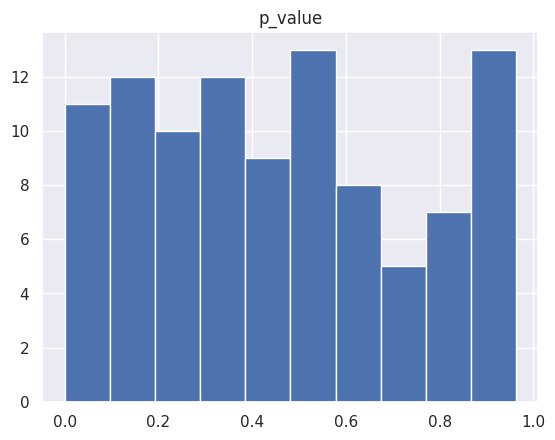

In [18]:
pval_df.hist();

**(b)**


In [19]:
pval_df[pval_df["p_value"] < 0.05]

,p_value
14,0.000807
27,0.035539
39,0.022933
44,0.009551


We reject $4$ null hypotheses at level $\alpha = 0.05$

**(c)**


In [20]:
multipletests(pval_df["p_value"], alpha=0.05, method="bonferroni")[0].sum()

0

We fail to reject any null hypotheses when controlling the $\text{FWER}$ at level $0.05$.

**(d)**


In [21]:
multipletests(pval_df["p_value"], alpha=0.05, method="fdr_bh")[0].sum()

0

Again we fail to reject any when controlling the $\text{FDR}$ at level $0.05$. 

**(e)** We'll start by picking the $10$ fund managers who perform the best in our data.

In [22]:
top10 = pval_df.sort_values(by="p_value")[:10]
top10

,p_value
14,0.000807
44,0.009551
39,0.022933
27,0.035539
72,0.050266
0,0.053880
50,0.065646
20,0.075501
9,0.077960
35,0.087938


Controlling the $\text{FWER}$ at level $0.05$

In [23]:
multipletests(top10["p_value"], alpha=0.05, method="holm")[0].sum()

1

We reject $1$ null hypothesis.

Now controlling the $\text{FDR}$ at level $0.05$

In [24]:
multipletests(top10["p_value"], alpha=0.05, method="fdr_bh")[0].sum()

2

We reject $2$ null hypotheses here.

**(f)** The analysis in **(e)** is misleading because when we "cherry-pick" the smallest $p$-values it's the same as if we performed $1000$ tests implicitly, but without adjusting for multiple testing, which results in us rejecting null hypotheses that we wouldn't reject had we adjusted for multiple testing, purely due to chance.